In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_json="eval_results/meta-llama_Meta-Llama-3.1-8B-Instruct.json"
target_json="eval_results/meta-llama_Meta-Llama-3.1-70B-Instruct.json"

In [10]:
df=pd.read_json(target_json)

In [11]:
#predicted_valueをfloatに変更｡変換できないものはNaNにする
df["predicted_value_float"] = pd.to_numeric(df["predicted_value"], errors='coerce')

#actual_value, predicted_valueの誤差率を計算(絶対値を取る
df["error_rate"]=(df["Value"]-df["predicted_value_float"])/df["Value"]
df["error_rate"]=df["error_rate"].abs()

In [12]:
sel_df=df[df["error_rate"]>=0]
sel_df["predicted_text"].tolist()
sel_df.shape,df.shape

((6668, 10), (7241, 10))

In [13]:
df[df["error_rate"]!=df["error_rate"]]["predicted_text"].tolist()

['#Prediction\n1.27-1.47 g/cm3\n\n#Reason\nBakelite is a type of phenol formaldehyde resin, which is a thermosetting polymer. The density of Bakelite can vary depending on the specific formulation and manufacturing process, but it is generally in the range of 1.27-1.47 g/cm3. This range is based on the densities of similar phenol formaldehyde resins and the typical density range for thermosetting polymers.',
 '#Prediction\n0\n\n#Reason\nThe dipole moment of a molecule is a measure of the distribution of electric charge within the molecule. In the case of carbon dioxide (CO2), the molecule has a linear geometry, with the carbon atom bonded to two oxygen atoms. The oxygen atoms have a slightly negative charge due to their higher electronegativity compared to the carbon atom, which has a slightly positive charge.\n\nHowever, because the molecule is linear and symmetrical, the dipole moments of the two C-O bonds cancel each other out, resulting in a net dipole moment of zero. This is why t

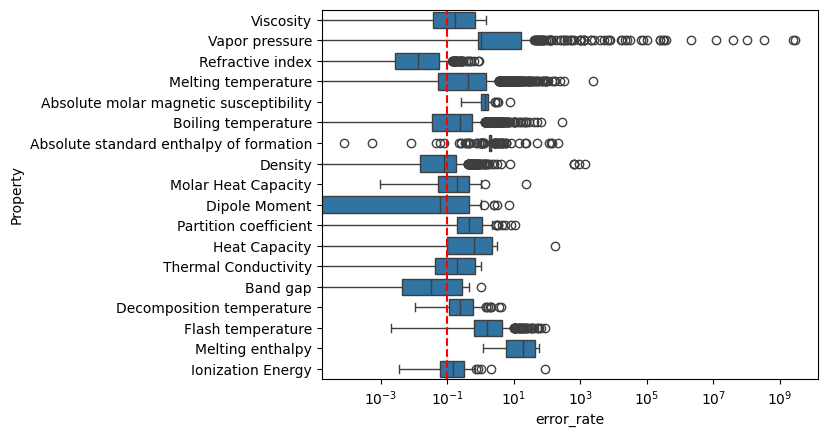

In [14]:
sns.boxplot(x="error_rate",y="Property",data=sel_df)
#plt.xlim(0,2)
#xはlog
plt.xscale("log")
#x=0.1に縦線を引く
plt.axvline(x=0.1, color='r', linestyle='--')


In [7]:
df

,CompName,SMILES,Property,Value,unit,Source,predicted_value,predicted_text,predicted_value_float,error_rate
0,Ammonia,N,Viscosity,0.2760,[mPas],Wikipedia/Wikidata,0.34,#Prediction\n# 0.34\n\n#Reason\nTo predict the...,0.340,0.231884
1,Ammonia,N,Vapor pressure,857.3000,[kPa],Wikipedia/Wikidata,6.32,#Reason\nTo predict the vapor pressure of ammo...,6.320,0.992628
2,Ammonia,N,Refractive index,1.3327,[-],Wikipedia/Wikidata,1.783,#Prediction\n1.783\n\n#Reason\nTo predict the ...,1.783,0.337885
3,Ammonia,N,Melting temperature,-77.7300,[oC],Wikipedia/Wikidata,-18,#Prediction\n-18\n\n#Reason\nTo predict the me...,-18.000,0.768429
4,Ammonia,N,Absolute molar magnetic susceptibility,18.0000,[10^-6 cm3/mol],Wikipedia/Wikidata,-0.715,#Prediction\n-0.715\n\n#Reason\nTo predict the...,-0.715,1.039722
...,...,...,...,...,...,...,...,...,...,...
7236,unknown,F[Zr-2](F)(F)(F)(F)F.[K+].[K+],Density,3.4800,[g/cm3],Wikipedia/Wikidata,1.134,#Reason\nTo predict the density of the compoun...,1.134,0.674138
7237,unknown,C1(=NC(=NC(=N1)N)N)N,Density,1.5740,[g/cm3],Wikipedia/Wikidata,1.35,#Reason\nTo predict the density of the compoun...,1.350,0.142313
7238,unknown,C1(C(C(C(C(C1O)O)O)O)O)O,Density,1.7520,[g/cm3],Wikipedia/Wikidata,7.31,#Reason\nTo predict the density of the compoun...,7.310,3.172374
7239,unknown,[Li+].[O-][Nb](=O)=O,Density,4.6440,[g/cm3],Wikipedia/Wikidata,2.48,#Prediction\n2.48\n\n#Reason\nTo predict the d...,2.480,0.465978
